In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from util.evaluation import SMAPE
%matplotlib inline

In [2]:
traffic=pd.read_csv('../data/cl_traffic.csv')

## Deal with NA 

In [3]:
traffic.head(5)

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,langs,vtype,access,entity
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,16.0,27.0,29.0,23.0,54.0,38.0,zh.wikipedia.org,spider,all-access,2NE1
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,54.0,25.0,26.0,23.0,13.0,81.0,zh.wikipedia.org,spider,all-access,2PM
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,4.0,7.0,3.0,4.0,7.0,6.0,zh.wikipedia.org,spider,all-access,3C
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,6.0,16.0,19.0,30.0,38.0,4.0,zh.wikipedia.org,spider,all-access,4minute
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,23.0,28.0,14.0,8.0,7.0,zh.wikipedia.org,spider,all-access,52 Hz I Love You


In [4]:
traffic=traffic.fillna(0)

In [5]:
traffic.shape

(145063, 807)

## Linear Regression

In [42]:
score=[]
tot_len=len(traffic.index)
for u in traffic.index:
    print('Training...|| {:.2f}'.format(u/tot_len*100)+'%',end='\r')
    sample=traffic.loc[u][:-4].values

    period=61
    sample_x=[]
    sample_y=[]
    for i in np.arange(len(sample)-1,0,-1):
    #     print(i)
        if i >= period-1:

            sample_x.append(sample[i-period+1:i])
            sample_y.append(sample[i])

    sample_x=sample_x[::-1]

    sample_y=sample_y[::-1]

    train_x,test_x=np.array(sample_x)[:600,:],np.array(sample_x)[600:]
    train_y,test_y=np.array(sample_y)[:600],np.array(sample_y)[600:]


    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(train_x,train_y)


    pred_y=regr.predict(test_x)


    score.append(SMAPE(test_y,pred_y))

Training...|| 2.69%

/home/yicheng/DS/Traffic/web_traffic/analysis/util/evaluation.py:11: RuntimeWarning: invalid value encountered in true_divide
  return np.mean(np.abs(truth-pred)*2/(np.abs(truth)+np.abs(pred)))


In [49]:
np.nanmean(score)

0.5475762669487753

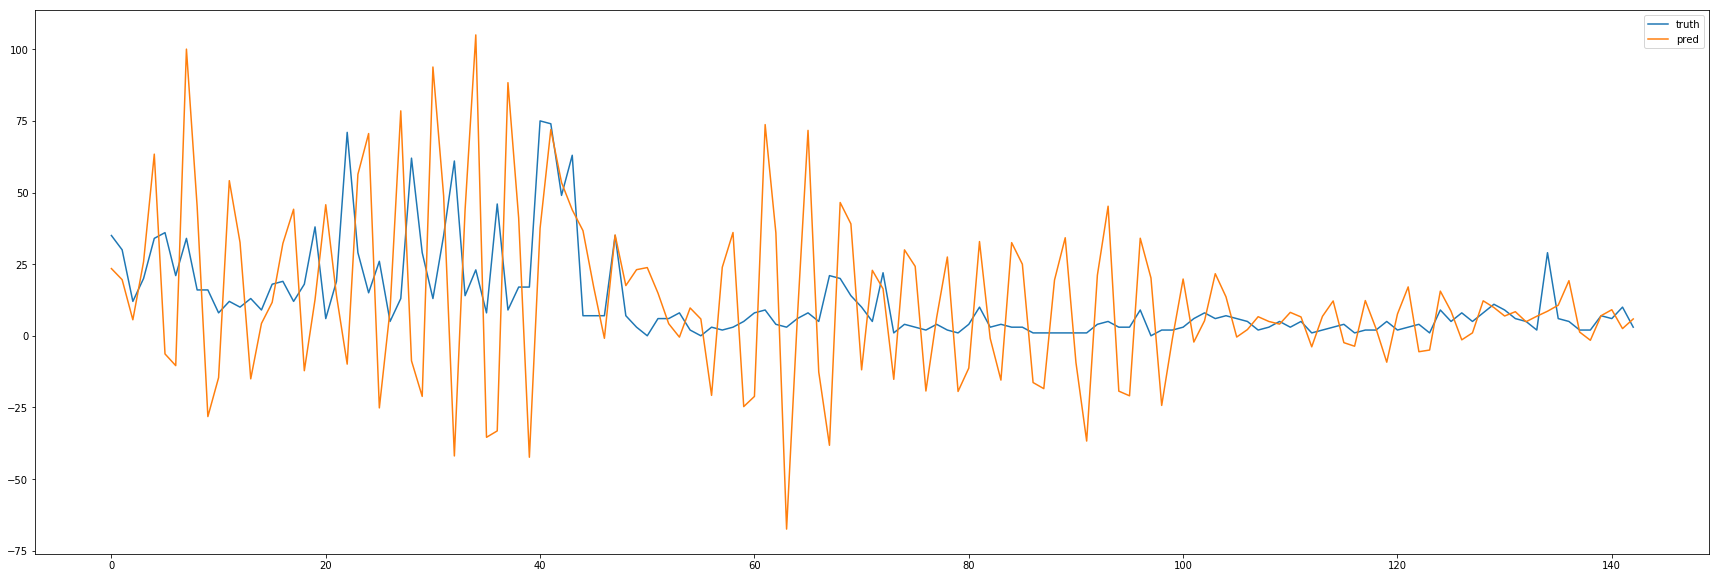

In [51]:
plt.figure(figsize=(30,10))
plt.plot(test_y,label='truth')
plt.plot(pred_y,label='pred')
plt.legend()